In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Loading csv file and showing first 5 rows
cancer_frame = pd.read_csv('./data_cancer.csv')
cancer_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Dropping 'id' column
cancer_frame = cancer_frame.drop(['id'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f0bdc18>]], dtype=object)

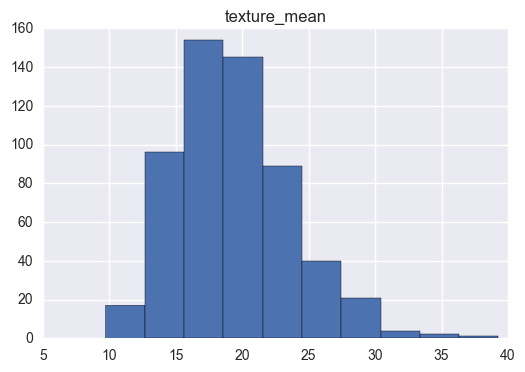

In [4]:
# Plotting a simple histogram from 'texture_mean' column
cancer_frame.hist(['texture_mean'])

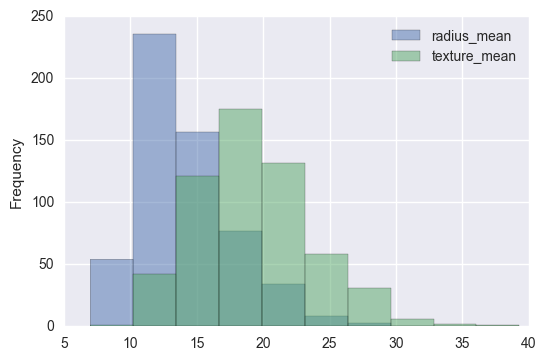

In [5]:
# Defining and plotting a complete histogram
cancer_frame_histogram = pd.DataFrame({
        'radius_mean':cancer_frame['radius_mean'], 
        'texture_mean':cancer_frame['texture_mean']})
cancer_frame_histogram.plot.hist(alpha=0.5)

In [7]:
# Setting 'target' as the 'y' vector and dropping columns wich are not useful
target = cancer_frame.diagnosis
cancer_frame = cancer_frame.drop(['Unnamed: 32', 'diagnosis'], axis=1)

Number of Benign:  357
Number of Malignant :  212


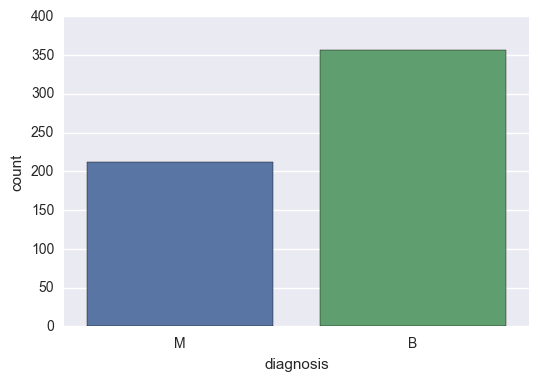

In [8]:
plot_sns = sns.countplot(target, label='Count')
B, M = target.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [21]:
# Scaling data, moving values to a normal distribution with mean zero and std 1
corpus = cancer_frame
corpus_scaled = (corpus - corpus.mean()) / (corpus.std())
corpus_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

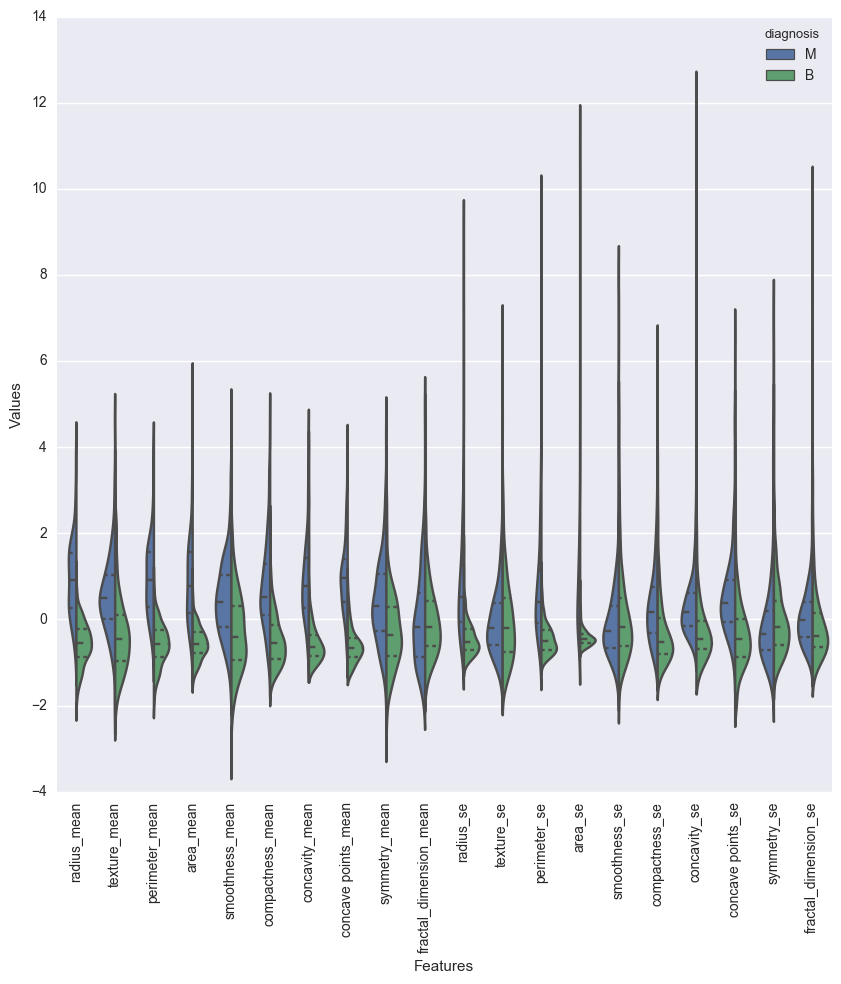

In [29]:
# Preparing data to visualize as violin plot
# Using 20 first columns
corpus = pd.concat([target, corpus_scaled.iloc[:,0:20]],axis=1)
corpus = pd.melt(corpus, id_vars="diagnosis", var_name="Features", value_name='Values')

# Setting the plt object
plt.figure(figsize=(10,10))
# Setting the violinplot objetc with respecitve atributes
sns.violinplot(x="Features", y="Values", hue="diagnosis", data=corpus, split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

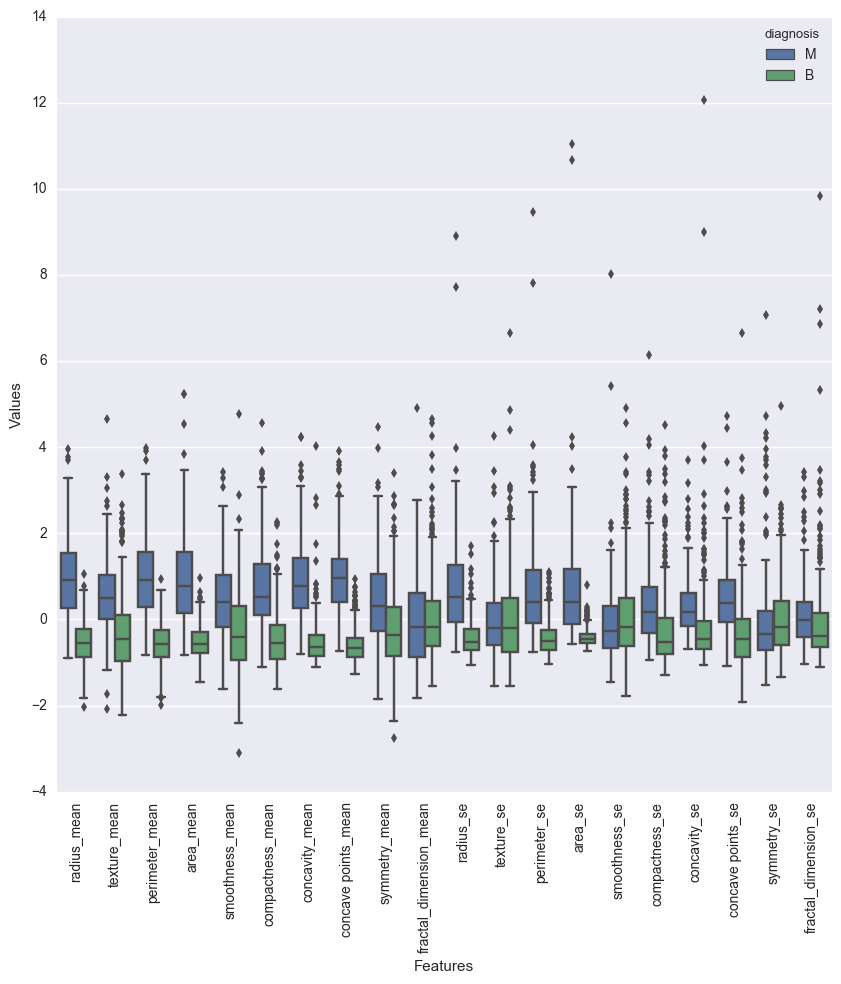

In [31]:
# Visualizing first 20 elements by a box plot
plt.figure(figsize=(10,10))
sns.boxplot(x="Features", y="Values", hue="diagnosis", data=corpus)
plt.xticks(rotation=90)

/Users/Fer/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


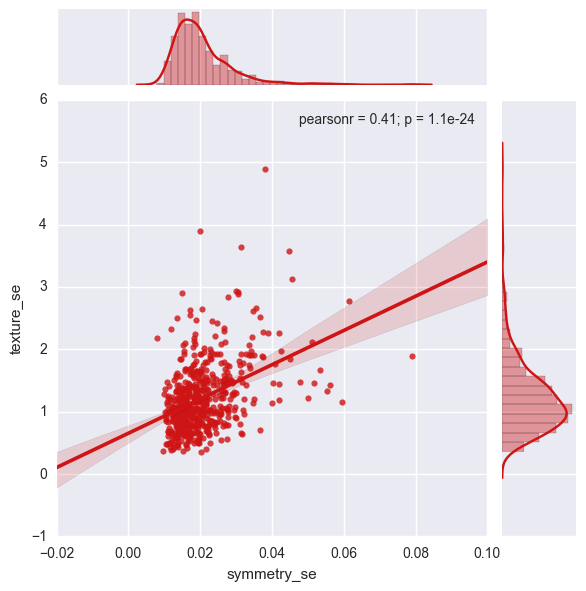

In [39]:
# Plotting 'joint plot' to visualize a correlation between 2 variables. 
# Correlation is taken from Pearsonr value, 1 is totally correlated.
sns.jointplot(cancer_frame.loc[:,'symmetry_se'], 
              cancer_frame.loc[:,'texture_se'], kind="regg", color="#ce1414")

/Users/Fer/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/Fer/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


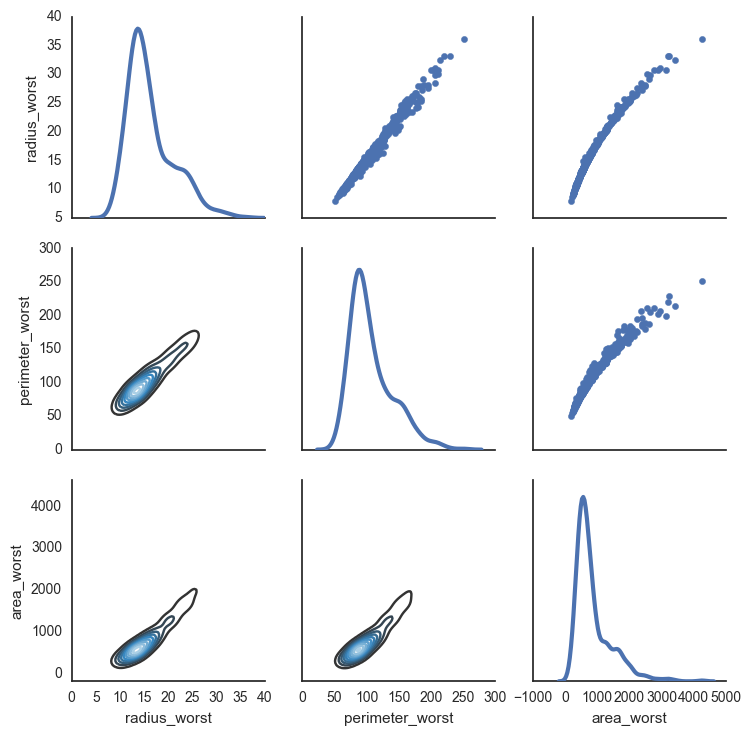

In [40]:
# To compare more than two variables we are going to use different plots
sns.set(style="white")
df = cancer_frame.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)